## Statistics For Machine Learning - Part 1

Statistics is a branch of Mathematics that deals with Collecting, analysing, Interpreting and Visualizing data. As Statistics is a significant tool which studies data to recognize certain useful patterns. 


*Important Note* : 
- In this folllowing explanation of Statistics we will follow through some code examples including pandas, matplotlib, and numpy libraries which are not yet introoduced to yet, So don't bother we will cover them in-detail in further segments of the next module.
- We also use some visualizations for distribution analysis of data hence just try to observe the distribution rather than focusing on the coding examples the code will be explained in the further modules.
- This segment broadly follows the Practical Statistics for Dtascience Book so for detailed understanding please refer to the book. 

Statistics for ML :
1. Data Representation
2. Estimates of Location
3. Estimates of Variability
4. 

### Data Representation 

Firstly, Let's talk about how data is represented in real world for especially Machine Learning purposes. Data originates from various sources and has seen an unprecedented surge in recent years. Massive amounts of new data are generated daily. However, this surplus data is mostly unstructured, making it challenging to extract useful knowledge and information. This is where data structuring becomes essential. Data can take the form of values, images, videos, analog signals, audios, or text paragraphs. While all types of data can be converted into a common representation format, each requires a unique approach for effective addressing and exploration.

We can divide data into two types CATEGORICAL having further two types Nominal and Ordinal, NUMERICAL(Real values).


**RectangularData**  
Structured Data is represented in rectangular format having multiple rows and columns simply a two dimensional matrix.Programatically in python or R we represent that structured data in the format of DataFrames(Datasets) whilch are like spreadsheet. This is also the basic data structure for statistical and machine learning models.

***Feature*** is a column in that DataFrame (attribute, variable).

***Reocord*** is a row within the DataFrame (instance)

**Non rectangular Data**  
The non rectangular data which doesnt really have features rather have much complex information.
Timeseries Data, Spatial(geographical data), Graphical data(connections or network)


In python we use pandas library for data manipulation, exploration, cleaning, and other important functionality using data in represented as DataFrames.


### Estimates of Location
Beginning in statistics every where is with measures or estimations of loaction.
Variables with measured or count data might have thousands of distinct values. A
basic step in exploring your data is getting a “typical value” for each feature (variable):
an estimate of where most of the data is located (i.e., its central tendency).  
The ***central tendency*** measure is defined as the number used to represent the center or middle of a set of data values.

The three main estimates or measurements of the central tendency are..  
**Mean** : The sum of all values divided by the total no of observations.  
**Median** : The value such one-half of data lies above it and other half below it. Middle value in the sorted data.  
**Mode** : The most repeated value or frequent value in data.

Following other significant measures.  
**Weighted mean** : The sum of all values times a weight divided by the sum of the weights.
**Percentile** : The value s/t P percent of data lies below. (quantile)  
**Weighted median** : The value s/t one-half of the sum of weights lies above and below sorted data.  
**Outlier** : A data value that is very different from most of the data.(extreme value)
 

### Estimates of Variability

The estimates of variability are the measures of the second dimension of the data. It said that location is just one dimension in summarizing a feature , variability(dispersion) if the another dimension which mainly measures whetehr data values are tightly clustered or spread out. It refers to the amount of spread of the scores(data values) around the estimate of location.

**Deviations** : The differnece between observed values and the estimate of location. (erros, residuals)  
**Variance** : The sum of squared deviations divided by n-1 where n is no of data points. (mean squared error)  
**Standard deviation** : The square root of Variance.  
**Mean absolute Deviation** : The mean of the absolute values of deviations from means. (l1-Norm, Manhattan norm)  
**Median absolute deviation from the median** : The median of the absolute values of the deviations from the median.  
**Range** : The diffenrence between largest and smallest value in the data.  
**Percentile** : The value s/t P percent of data lies below. The relative position of a specific vaue ina total dataset (quantile)  
**Interquartile Range** : the differnce between the 75th percentile and the 25th percentile. (IQR)  

**Degrees of Freedom (n or n-1)** : If you use the intuitive denominator of n in the variance formula, you will underesti‐mate the true value of the variance and the standard deviation in the population. Thisis referred to as a biased estimate. However, if you divide by n – 1 instead of n, the variance becomes an unbiased estimate.  


In [1]:
# importing the libraries
import numpy as np
import pandas as pd

In [9]:
# Generate a random dataset
np.random.seed(42)  # For reproducing the same output when this cell runs multiple times.

# Here example data points are generated or random samples are drawn from normal distribution(will be covered in next segment)
# Normal Distribution(Gaussian distribution) is a type of Probabilistic distribution.
data = np.random.normal(loc=100, scale=20, size=1000) 
data_points = pd.DataFrame(data)


In [20]:
# Calculate standard deviation of the data_points

# data_points[0] refers to the column or attribute of the data
# .std() will give the standard deviation of given data
std_dev = data_points[0].std() 

print(f"Standard Deviation: {std_dev:.2f}")

# .quantile() will give the quantile of the data at given level between [0,1]
q3 = data_points[0].quantile(0.75)
q1 = data_points[0].quantile(0.25)

# Calculate interquartile range (IQR)
iqr = q3 - q1
print(f"IQR: {iqr:.2f}")

Standard Deviation: 19.58
IQR: 25.91


### Exploring the Data Distribution
Till now we tried to estimate the data and comprise the information or distribution of data into a single number or metric or estimate. It is also important and helpful to explore how data is ditributed overall through some visualizations.

**Boxplot** : Shows the distribution of data which uses to find the outliers. (whisker plot)  
**Frequency table** : A tally of the count of numeric data values that fall intp a sset of intervals(bins).  
**Histogram** : A plot of the frequency table with specified no of bins on x-axis and the count on the y-axis.  
**Density plot** : Smoothen version of histogram, often based on a kernel density estimate.

0.05     69.480908
0.25     87.048194
0.50    100.506012
0.75    112.958878
0.95    133.539451
Name: 0, dtype: float64


Text(0, 0.5, 'Charges in Rupees')

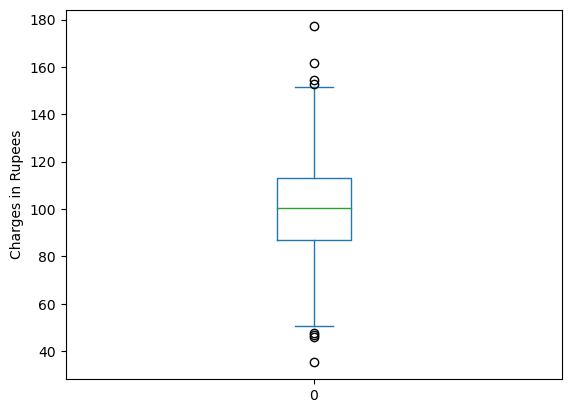

In [21]:
#BOXPLOT
# .quantile([list_of_quantiles]) will give the values of list of quantiles for given data
print(data_points[0].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
ax = data_points.plot.box() #box plot
ax.set_ylabel('Charges in Rupees')

In [23]:
# MEDIAN

data_points[0].median() # this exactly matches with the representation of 50th quartile in the above box plot

100.50601224469776

In [24]:
# FREQUENCY TABLE

charges = pd.cut(data_points[0], 5) #divide the total data into given no of bins with equal interval between the lowest and highest value of data
charges.value_counts() # count the total no of values in each bin

0
(91.927, 120.303]     498
(63.551, 91.927]      324
(120.303, 148.679]    142
(35.033, 63.551]       26
(148.679, 177.055]     10
Name: count, dtype: int64

Text(0.5, 0, 'total charges in rupees')

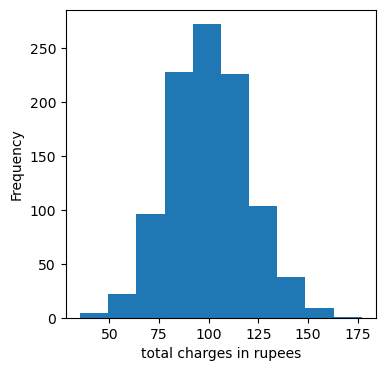

In [26]:
# HISTOGRAM PLOT

ax = data_points[0].plot.hist(bins = 10, figsize = (4,4)) # histogram of the data
ax.set_xlabel('total charges in rupees')

# As the given data is normaly distributed one hence we will get a bell shaped figure.

**Statistical Moments** : 
In statistical theory, location and variability are referred to as the
first and second moments of a distribution. The third and fourth
moments are called ***skewness*** and ***kurtosis***. Skewness refers to
whether the data is skewed to larger or smaller values, and kurtosis
indicates the propensity of the data to have extreme values. Gener‐
ally, metrics are not used to measure skewness and kurtosis;
instead, these are discovered through visual displays such as box and hist plots.

Text(0.5, 0, 'data')

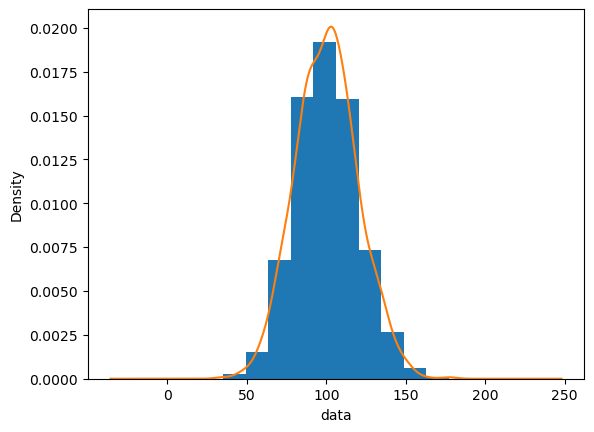

In [29]:
# DENSITY PLOT

ax = data_points[0].plot.hist(density=True) # get the density curve 
data_points[0].plot.density(ax=ax) # plot the density curve in the hist plot itself
ax.set_xlabel('data')

### Exploring Binary and Categorical Data

For categorical or binary data we will explore the proportions, percentages of the distinct values in the attributes to get better insights of the data. The knowledge present in the categrical attributes of data is often representedd in the best way by counting the no of values each category posses or percentage of values does each category holds. This sometimes gets us the reasons on why the data is being so.

**Mode** : The most commonly occuring category or value in the attribute.  
**Bar Charts** : The frequency or proportion of each category plotted as bars.  
**Pie Charts** : The frequency or proportion of each category plotted as wedges in a pie.  
**Expected value** : When the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurence. The expected value is calculated by multiplying each of the possible outcomes by the likelihood each outcome will occur and then summing all of those values. By calculating expected values, investors can choose the scenario most likely to produce the outcome that they seek.

Text(0, 0.5, 'count')

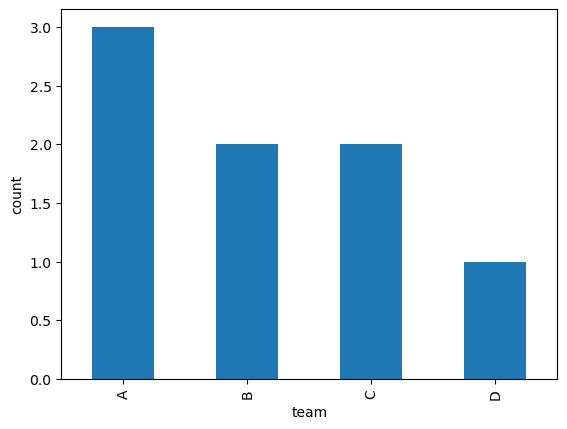

In [37]:
# BA# BAR PLOT 

# lets make some new data for this representation.
df = pd.DataFrame({
    'team': ['A', 'A', 'A', 'B', 'B', 'C', 'C', 'D'],
    'points': [18, 22, 29, 25, 14, 11, 10, 15]
})
counts = df['team'].value_counts() # total no of values asociated with each category
ax = counts.transpose().plot.bar() # plot the count of each category in each bar
ax.set_ylabel('count')
# type(counts)

### Correlation
Correlation between two variables in an equation or two attributes in a dataset is how the change in one variable effects the change in another variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

There is a blog that I have written about Correlation link-[***Correlation among features***](https://medium.com/@govardhanv/correlation-among-features-and-between-feature-output-label-intuition-and-implementation-1fe66a1332a9) which gives deeper understanding about correlation and types in it with detailed information.  

**Correlation Coefficient** : Metric that measures the exten t to which numeric variables are associated with one another(ranges from -1 to 1).  
**Correlation Matrix** : A table where  variables are shown in both rows and columns, and the cell values are the correlations between variables.  
**Scatterplot** : A plot in which the x-axis is the value of one variable and the y-axis the value of the other variable.


**Correlation Coefficient** : 
- More useful is a standardized variant: the correlation coefficient, which gives an estimate of the correlation between two variables that always lies on the same scale. To compute ***Pearson’s correlation coefficient***, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations and n-1.  
- Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric.
- It is not possible to compute the correlation coefficient for categorical varibles where correlatin only holds to some continous data.
- like mean and SD Correlation is also sensitive to outliers in the data.
- We have other correlatin coefficients like ***Spearman's correlation coefficient*** and ***Kendall's tau correlation coefficient*** too these coefficients work based on the ranks rather than values of data. Hence they are robust to outliers and also can handle some non linearities in the data.

In [43]:
## CORRELATION MATRIX

np.random.seed(42)
data_numeric = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'C': np.random.rand(10)
})

# The generated data is some randomly generated numbers using numpy library
data_numeric

,A,B,C
0,0.374540,0.020584,0.611853
1,0.950714,0.969910,0.139494
2,0.731994,0.832443,0.292145
3,0.598658,0.212339,0.366362
4,0.156019,0.181825,0.456070
5,0.155995,0.183405,0.785176
6,0.058084,0.304242,0.199674
7,0.866176,0.524756,0.514234
8,0.601115,0.431945,0.592415
9,0.708073,0.291229,0.046450


In [44]:
data_numeric.corr() # corr() method in a dataframe will give you the correalatin matrix
# we can plot the correlation matrix using heatmap but its up to you to go research and try.
# Any way we will learn about it in Data exploration.

,A,B,C
A,1.000000,0.704285,-0.372964
B,0.704285,1.000000,-0.450620
C,-0.372964,-0.450620,1.000000


In the above correlation matrix the correlation between the variable and itself is 1 because a variable is cmpletely correlated with itself.

Text(0, 0.5, 'B')

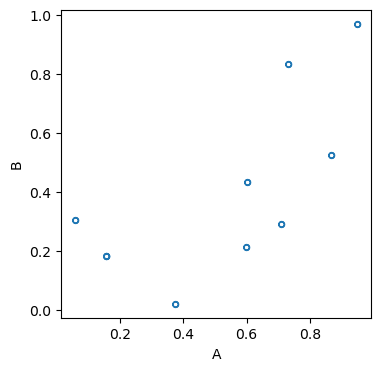

In [48]:
# SCATTER PLOT

# plotting scatter plot between features 'A' and 'B' in 'data_numeric' data.
ax = data_numeric.plot.scatter(x='A', y='B', figsize=(4, 4), marker='$\u25EF$')

ax.set_xlabel('A')
ax.set_ylabel('B')

**Multivariate Analysis** : 
Familiar estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis is an important method that compares two variables (bivariate analysis). Taking more than two variables at a time is multivariate analysis. 

Univariate analysis not depends on whether the data is numerical or categorical. But Bivariate analysis and Multivariate analysis depends on nature of data: Numeric vs Categorical.

In further Segments we will look into additional estimates and plots of Multivariate analysis.

This chapter has reviewed concepts ranging from simple metrics, such as estimates of location and variability, to rich visual displays that explore the relationships between multiple variables. The diverse set of tools and techniques combined with the expressiveness of the Python language, has created a significant ways to explore and analyze data.

- Its your work to explore more about the topics covered in this notebook and learn more. 
- As stated in the beginning that these topics were followed through the book "Practical Statistics for Data Scientists".
- This book would be most helpful if you are a beginner and want to understand statistics for ML and DataScience.
- Use MLWithMe for more such information and keep following the content.

In the next segment we will look into different types of Distributions. 